### Pythonkursus NFA 23 april

Velkommen tilbage. I dag skal vi kigge på hvordan man behandler data i python.
Vi starter med at importere den primære pakke til datahåndtering i python: pandas (https://pandas.pydata.org/docs/user_guide/index.html)


In [1]:
import pandas as pd

Dernæst skal vi have indlæst noget data.

Potentielle datasæt:

https://www.kaggle.com/datasets/ajaxianazarenka/premier-league

https://www.kaggle.com/datasets/richave/tortilla-prices-in-mexico?select=tortilla_prices.csv

https://www.kaggle.com/datasets/johnharshith/bicycle-accidents-in-great-britain-1979-to-2018

https://www.opendata.dk/city-of-copenhagen/trafiktal

https://www.opendata.dk/city-of-copenhagen/parkeringstaellinger


Øvelser:
- Read
- Merge
- Filter (on multiple columns)
- Clean data (some weird values)
- Datetime
- Groupby
- Plot (evt +seaborn)
- Replicate plot
- Save plot

Idéer til explorative spørgsmål/opgaver til udforskning af koncepter:
- In what conditions do the fatal/severe accidents most often happen? 
- Number of accidents each year? Plot it.
- What day had the most accidents?
- On what day was the accident with the most casualties? 
- At what time during the day does most accidents happen?
- What does the most common accident look like? Who, when, what. 
- Is there a connection between number of casualties and speedlimit?
- Explore correlations between variables in the data on your own 

### Indlæs data
---

Når vi arbejder med data i python, centrerer det sig ofte omkring en Pandas dataframe. Det er en matrix med rækker og kolonner, som man ellers ville kende det fra andre programmer. Denne dataframe har da en masse attributter og metoder, som man kan udnytte. 
Når vi bruger pandas til at læse en fil, kommer den ind som en dataframe. Så lad os starte med at indlæse noget data. I dag har vi fat i en .csv fil, så vi bruger funktionen pandas.read_csv(), som tager stien til filen som det første argument. 

Indlæs datasættene _Accidents_ og _Bikers_, som vi har sendt ud.

_This Dataset contains data such as the accident index, number of vehicles involved, number of casualties, date and time of accident, speed limit, road and weather conditions, day of accident and finally the road type in which the accident took place. It also includes the gender of person driving the bicycle, severity of the accident and the age group range of the victims._

In [2]:
Accidents = pd.read_csv(".\Data\BA_Accidents.csv")
Bikers = pd.read_csv(".\Data\BA_Bikers.csv")

Lad os prøve at kigge på det indlæste data. Det kan vi gøre med funktionen .head() eller vi kan blot skrive navnet på variablen i en celle og køre cellen (du har måske efterhånden lagt mærke til, at man kan få et output ud af en celle uden at bruge print())

In [3]:
Accidents.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


Vi kan også se på dimensionerne af datasættene, altså hvor mange rækker og kolonner hvert datasæt har. Det kan vi gøre med funktionen [`.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html). I dokumentationen i linket kan du læse, hvordan outputtet af `.shape` skal fortolkes. Hvor mange rækker og kolonner er der i hvert datasæt?

In [4]:
# Skriv din kode til at printe dimensionerne for de to datasæt her
print(Accidents.shape)
print(Bikers.shape)

(827861, 11)
(827871, 4)


### Filtrering af data

---

#### Udvælgelse af kolonner

En Pandas Dataframe består af index og kolonner. Dem kan vi undersøge ved at bruge attributterne [`.index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html) og [`.columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html). 

In [5]:
print(Accidents.index)
print(Accidents.columns)

RangeIndex(start=0, stop=827861, step=1)
Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions'],
      dtype='object')


Outputtet fra `.columns` er en liste af de kolloner der indgår i datasættet. Se om du kan huske det vi lærte om at slice liste fra første dag på kurset: gem kolonnenavnene i en variabel du kalder `acc_cols`, og slice så denne liste så du gemmer de første fem kolonnenavne i en variabel du kalder `slct_cols`.

In [6]:
# Skriv din kode her
acc_cols = Accidents.columns
slct_cols = acc_cols[:5]


print(f"{slct_cols = }")

slct_cols = Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time'],
      dtype='object')


Ligesom at vi kan slice lister med indeks, så kan vi slice dataframes med kolonnenavne. Vi kan vælge enkelte kolonner ved at indeksere datasættet med kantede parenteser `[]`. Fx kan vi vælge kolonnen `"Time"` fra `Accidents`:

In [7]:
Accidents["Time"]

0         18:20
1         09:15
2         08:45
3         13:40
4         18:50
          ...  
827856    14:55
827857    07:45
827858    13:25
827859    21:10
827860    15:14
Name: Time, Length: 827861, dtype: object

Print i cellen nedenfor hvilken type (`type()`) datasættet `Accidents` er og hvilken type den enkelte kolonne `Accidents["Time"]` er.

In [8]:
# Print typen af Accidents her
print(type(Accidents))

# Print typen af Accidents["Time"] her
print(type(Accidents["Time"]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


`Accidents` er altså en såkaldt _DataFrame_, og kolonnen `Accidents["Time"]` er en _Series_. En DataFrame består nemlig af en samling af serier.

Vi kan også vælge flere kolonner af gangen ved at indsætte en _liste af kolonnenavne_ i stedet for et enkelt navn. Prøv at vælge `"Accident_Index"`,`"Date"`, `"Time"` og `"Day"` fra `Accidents`.

In [9]:
# Skriv din kode her
Accidents[["Accident_Index", "Date", "Time", "Day"]]

,Accident_Index,Date,Time,Day
0,197901A1SEE71,1979-01-01,18:20,Monday
1,197901A2JDW40,1979-02-01,09:15,Tuesday
2,197901A4IJV90,1979-04-01,08:45,Thursday
3,197901A4NIE33,1979-04-01,13:40,Thursday
4,197901A4SKO47,1979-04-01,18:50,Thursday
...,...,...,...,...
827856,2018983118818,2018-02-07,14:55,Monday
827857,2018983119218,2018-07-24,07:45,Tuesday
827858,2018983120618,2018-10-08,13:25,Friday
827859,2018983121918,2018-07-18,21:10,Wednesday


#### Udvælgelse af rækker og kolonner

Vi kan også vælge bestemte rækker ud ved at bruge funktionerne [`.loc[]/.iloc[]`](https://pandas.pydata.org/docs/user_guide/indexing.html#). Disse to funktioner lader os udvælge rækker og kolonner på samme tid, og er en effektiv måde at filtrere dataframes på. `.loc[rækkenavne/index, kolonnenavne]` baserer sig på navnene i dataframes, mens `.iloc[rækkenumre, kolonnenumre]` baserer sig på indeks (altså tal, ligesom når vi slicer lister). Du kan både indsætte lister og enkelte elementer i funktionerne.

Udvælg de første 100 rækker, samt variablene "Number_of_Vehicles", "Road_conditions" og "Road_type" ved at bruge hhv. `.loc[]` og `.iloc[]` 

In [10]:
# Srkiv kode hvor du bruger .loc her
Accidents.loc[:99, ["Number_of_Vehicles", "Road_conditions", "Road_type"]]

,Number_of_Vehicles,Road_conditions,Road_type
0,2,Snow,Dual carriageway
1,1,Snow,Unknown
2,2,Snow,Unknown
3,2,Wet,Unknown
4,2,Wet,Unknown
...,...,...,...
95,2,Wet,Roundabout
96,2,Wet,Unknown
97,2,Wet,Unknown
98,2,Wet,Unknown


In [11]:
# Skriv kode hvor du bruger .iloc her
Accidents.iloc[:100, [1, 6, 9]]

,Number_of_Vehicles,Road_conditions,Road_type
0,2,Snow,Dual carriageway
1,1,Snow,Unknown
2,2,Snow,Unknown
3,2,Wet,Unknown
4,2,Wet,Unknown
...,...,...,...
95,2,Wet,Roundabout
96,2,Wet,Unknown
97,2,Wet,Unknown
98,2,Wet,Unknown


#### Udvælgelse af rækker på baggrund af kolonneværdier

Ofte vil vi gerne udvælge data på baggrund af værdier i kolonner. Det kalder vi "conditional filtering". Lad os sige at vi i datasættet `Accidents` gerne vil vælge de rækker, hvor vejforholdene var præget af sne. Det gør vi ved at vælge kolonnen med vejforhold fra datasættet og lave en logisk test (som vi introducerede på første dag af kurset).

In [12]:
Accidents["Road_conditions"] == "Snow"

0          True
1          True
2          True
3         False
4         False
          ...  
827856    False
827857    False
827858    False
827859    False
827860    False
Name: Road_conditions, Length: 827861, dtype: bool

Outputtet fra denne logiske test er en serie af Booleans, som for hver række i datasættet angiver om kolonnen `"Road_conditions"` er lig `"Snow"`. Vi kan bruge en sådan serie til at udvælge rækker fra datasættet. Det gør vi på samme måde som vi udvalgte kolonner i starten, ved at bruge kantede parenteser `[]`. Prøv nedenfor at udvælge de rækker fra `Accidents` hvor vejrforholdene bød på regn.

In [13]:
# Skriv din kode her
Accidents[Accidents["Weather_conditions"] == "Rain"]

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
9,197901A7PDD49,2,1,1979-07-01,15:15,30.0,Wet,Rain,Sunday,Unknown,Daylight
11,197901A8HBU61,2,1,1979-08-01,07:05,30.0,Wet,Rain,Monday,Unknown,Darkness lights lit
22,197901AAGJE41,2,1,1979-10-01,06:45,30.0,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit
23,197901AAHCI12,2,1,1979-10-01,07:10,30.0,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit
24,197901AAHCL87,2,1,1979-10-01,07:10,30.0,Snow,Rain,Wednesday,Roundabout,Darkness lights lit
...,...,...,...,...,...,...,...,...,...,...,...
827794,201897NA00808,3,2,2018-08-19,08:27,30.0,Wet,Rain,Sunday,Roundabout,Daylight
827821,201897UA01502,2,1,2018-02-18,18:45,30.0,Wet,Rain,Sunday,Single carriageway,Darkness lights lit
827827,201897UA70104,2,1,2018-03-04,19:40,30.0,Wet,Rain,Tuesday,Single carriageway,Darkness lights lit
827850,201897UD70812,2,1,2018-12-17,20:08,30.0,Wet,Rain,Monday,Roundabout,Darkness lights lit


På denne måde kan vi definere en ny dataframe med de udvalgte værdier. Denne dataframe kan vi da udvælge specifikke kolonner fra.

Prøv selv nedenfor at vælge kolonnen `"Number_of_Vehicles"` for de rækker hvor `"Speed_limit"` er højere end 30.

In [14]:
# Skriv din kode her
Accidents[Accidents.Speed_limit > 30].Number_of_Vehicles

0         2
5         2
7         2
10        1
52        2
         ..
827838    2
827841    2
827849    2
827851    2
827853    2
Name: Number_of_Vehicles, Length: 129991, dtype: int64

### Merge datasæt
---
Nu bevæger vi os videre til et andet vigtigt koncept, nemlig at "merge" datasæt sammen. Vi indlæste i begyndelsen to datasæt: `Accidents` og `Bikers`. De to datasæt skal vi prøve at merge sammen. Først skal vi finde ud af, om vi har en variabel, som vi kan merge de to datasæt på. Prøv at printe kolonnenavnene for de to datasæt. Hvilke kolonne(r) overlapper i de to datasæt?

In [15]:
# Skriv din kode her
print(Accidents.columns)
print(Bikers.columns)

Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions'],
      dtype='object')
Index(['Accident_Index', 'Gender', 'Severity', 'Age_Grp'], dtype='object')


Selvfølgelig skal man have godt styr på dokumentationen af datasæt før man merger, så man er sikker på at man rent faktisk merger på variable der identificerer kobling mellem datasættene. I det her tilfælde ved vi at vi kan merge på .

De to datasæt deler en variabel: `"Accident_Index"`

Denne kan vi merge de to datasæt med. Vi vil gerne bruge pandasfunktionen [`.merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

Prøv at se om du kan læse dokumentationen og derefter merge de to datasæt og gemme koblingen i et nyt datasæt som du kalder `df`.

In [16]:
# Skriv din kode her
df = Accidents.merge(Bikers, on="Accident_Index")

### Undersøge datasættet og udregne simple statistikker
---

Vi har nu merget datasættene sammen til ét datasæt, `df`, og vil nu undersøge vores samlede datasæt lidt nærmere.

Først bruger vi pandas' `columns` function til at se alle kolonnenavnene i datasættet

In [17]:
df.columns

Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions', 'Gender', 'Severity', 'Age_Grp'],
      dtype='object')

Vi kan undersøge en dataframe med funktionen .describe(), for at få et hurtigt overblik. 
For talvariable fremgår der en simpel deskriptiv statistik og for 'string'-variable er antallet af unikke værdier, den mest hyppige værdi beskrevet, samt frekvensen af denne.  

In [18]:
df.describe(include="all")

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
count,827861,827861.000000,827861.000000,827861,827861,827861.000000,827861,827861,827861,827861,827861,827861,827861,827861
unique,827861,NaN,NaN,14609,1438,NaN,6,10,7,6,3,3,3,9
top,197901A1SEE71,NaN,NaN,1983-11-25,17:00,NaN,Dry,Clear,Wednesday,Single carriageway,Daylight,Male,Slight,11 to 15
freq,1,NaN,NaN,166,12122,NaN,633936,683162,136756,656703,660657,660025,681568,169943
mean,NaN,1.986178,1.047212,NaN,NaN,33.340934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.311600,0.253509,NaN,NaN,9.278129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000,1.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000,1.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.000000,1.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lægger du mærke til noget interessant? 

Udover at afsløre potentielle outliere, kan vi også her se hvilken dag der skete flest uheld på og i hvilke forhold det mest hyppige uheld sker. 

Du kan også undersøge hvilke unikke værdier der er i hver kolonne ved brug af funktionen _.unique()_

Du kan jo undersøge kolonnerne med _conditions_. 

In [19]:
df.Weather_conditions.unique()

array(['Unknown', 'Rain', 'Snow', 'Fog', 'Clear', 'Clear and windy',
       'Other', 'Rain and windy', 'Snow and windy', 'Missing data'],
      dtype=object)

Lad os rydde lidt op i vores data. Lad os fjerne alle rækker med 'Missing Data', samt observationen med en meget høj _Speed\_limit_

In [20]:
df = df[
    (df.Road_conditions != "Missing Data")
    & (df.Weather_conditions != "Missing Data")
    & (df.Weather_conditions != "Missing data")
    & (df.Speed_limit < 200)
    & (df.Number_of_Casualties < 30)
]
df.sort_values(by="Number_of_Casualties", ascending=False)

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
18365,197947SA90508,3,13,1979-10-20,12:30,30.0,Dry,Clear,Saturday,Single carriageway,Daylight,Male,Slight,11 to 15
624794,2006600CO9003,13,13,2006-08-01,10:10,60.0,Frost,Clear,Sunday,Single carriageway,Daylight,Male,Fatal,11 to 15
301237,1990440DW0082,8,13,1990-04-21,15:43,30.0,Dry,Clear,Saturday,Single carriageway,Daylight,Female,Fatal,66 to 75
418054,1995440SC0309,2,13,1995-11-09,12:59,30.0,Dry,Clear,Monday,Single carriageway,Daylight,Female,Slight,21 to 25
353902,1992950795192,2,13,1992-07-15,19:20,60.0,Dry,Clear,Wednesday,Single carriageway,Daylight,Male,Serious,11 to 15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,199001EO00415,2,1,1990-04-09,09:30,30.0,Dry,Clear,Tuesday,Unknown,Daylight,Male,Serious,21 to 25
283486,199001EO00425,2,1,1990-10-09,18:00,30.0,Dry,Clear,Monday,Dual carriageway,Daylight,Male,Serious,26 to 35
283487,199001EO00429,2,1,1990-09-17,09:05,30.0,Dry,Clear,Monday,Unknown,Daylight,Male,Slight,21 to 25
283488,199001EO00432,2,1,1990-09-13,15:12,30.0,Dry,Clear,Thursday,Dual carriageway,Daylight,Male,Slight,16 to 20


Vi kan også printe antallet af forskellige værdier for hver kolonne. Det kan vi gøre ved at bruge funktionen [`.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). Prøv at læs på dokumentationen, og brug så din viden om udvælgelse af kolonner til at printe fordelingen af observationer på aldersgrupper

In [21]:
# Skriv din kode her
print(df["Age_Grp"].value_counts())

11 to 15    169731
26 to 35    144624
16 to 20    122436
36 to 45    103501
21 to 25     87104
46 to 55     73366
6 to 10      67975
56 to 65     41828
66 to 75     15632
Name: Age_Grp, dtype: int64


Hvilken aldersgruppe er oftest involveret i styrt?

##### Tilføj en kolonne
Nu vil vi tilføje en kolonne til vores dataframe, nemlig hvilket år ulykken skete.
Dvs. du skal udtrække årstallet fra kolonnen _Date_ og tilføje denne til dataframen. En kolonne kan nemt tilføjes en eksisterende dataframe ved at kalde
```
df['navn_på_ny_kolonne'] = data
```

Hint: Vi kan udtrække årstallet fra kolonnen med datoer ved hjælp af enten [string methods](https://pandas.pydata.org/docs/user_guide/text.html#indexing-with-str) eller ved hjælp af [pandas datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [22]:
# skriv koden her
df["Year"] = df.Date.str[:4]
# df["Year"] = pd.to_datetime(df.Date).dt.year

### Plots
---

Det er faktisk relativt simpelt at lave hurtige grafer på baggrund af pandas dataframes. Det er nemlig indbygget en funktion [`.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html), som man kan bruge. Vi kan fx nemt plotte fordelinger af forskellige variable (sådan som vi udregnede i forrige afsnit) ved at tilføje `.plot()` funktionen. Denne funktion trækker på pakken matplotlib, som er den primære plottingpakke i Python.
Denne kan også importeres uafhængigt som:

In [23]:
import matplotlib.pyplot as plt

Plot herunder det totale antal ulykker per år i et line plot (funktionen .plot()), med år på x-aksen og antal ulykker på y-aksen. 

Det er god praksis at initialisere sin figur med plt.figure() og afslutte med plt.show(), så der ikke bliver printet unødige ting i cellen. Desuden kan du tilføje et label til x- og y-aksen, samt en titel til plottet. 


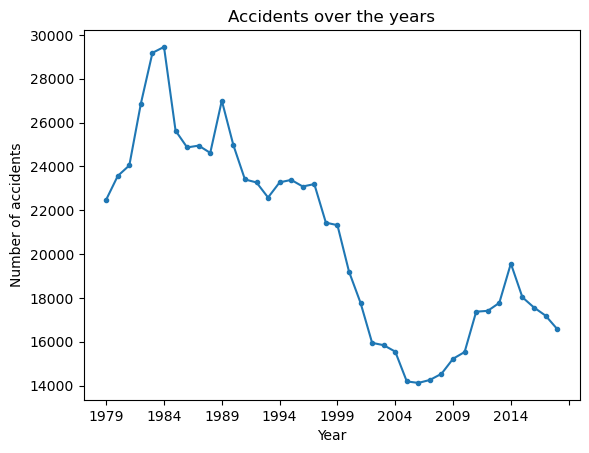

In [24]:
# Først skal du have talt op hvor mange ulykker der er hvert år. Husk at overveje hvordan du sorterer resultatet.
dfplot = df.Year.value_counts().sort_index()
plt.figure()
# skriv plotkode her
dfplot.plot(marker=".")
plt.xlabel("Year")
plt.ylabel("Number of accidents")
plt.title("Accidents over the years")
plt.show()

##### Tid på dagen

Plot antal uheld fordelt på time på dagen i et bar plot. 0 vil dække over 00:00-00:59:59. Hvornår på dagen tror du antallet af uheld er højest? Svarer plottet overens med din forventning?

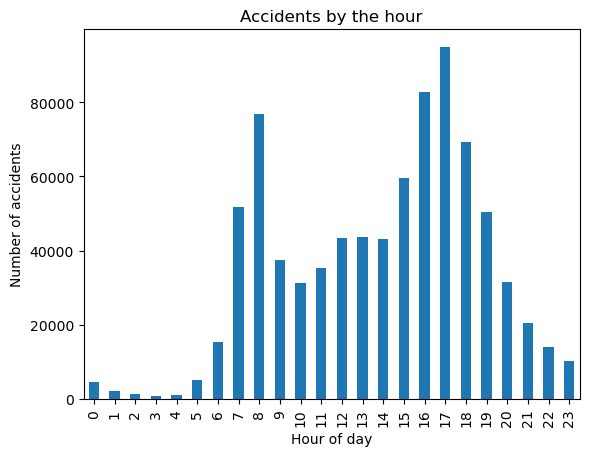

In [25]:
dfplot = pd.to_datetime(df["Time"]).dt.hour.value_counts().sort_index()
plt.figure()
# skriv plotkode her
dfplot.plot(kind="bar")
plt.xlabel("Hour of day")
plt.ylabel("Number of accidents")
plt.title("Accidents by the hour")
plt.show()

### Er der en sammenhæng mellem fartgrænser og alvorligheden af ulykkerne?
Nu vil vi prøve at undersøge om der er en sammenhæng mellem fartgrænsen (_Speed\_limit_) og alvorligheden af ulykken (_Severity_). 

Vi kan starte med at finde korrelationen mellem variablene. Dette kan vi gøre med pandas funktionen [.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). 

Dog skal vi først have omdannet den ene variabel, _Severity_, til noget numerisk for at kunne beregne korrelationen.
Brug funktionen [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) på _Severity_ variablen og definér en ny dataframe med resultatet. 

In [26]:
# skriv din kode her
Severity_dummies = pd.get_dummies(df.Severity)

Korrelationsfunktionen, `.corr()`, virker på en dataframe hvor den beregner korrelationen mellem alle numeriske variable. Så inden vi kan bruge denne, skal du have sammensat din dummy-dataframe med variablen _Speed_limit_. 

Udregn herefter korrelationerne og inspicér dem. 

In [27]:
dfcorr = pd.concat(
    [
        df["Speed_limit"],
        Severity_dummies,
    ],
    axis=1,
).corr()

dfcorr

,Speed_limit,Fatal,Serious,Slight
Speed_limit,1.000000,0.111883,0.113496,-0.137744
Fatal,0.111883,1.000000,-0.040792,-0.195417
Serious,0.113496,-0.040792,1.000000,-0.971933
Slight,-0.137744,-0.195417,-0.971933,1.000000


Hvis du har gjort det korrekt, skulle du gerne kunne se en svag positiv korrelation mellem de seriøse og dødelige uheld og fartgrænse og ligeledes en svag negativ korrelation mellem de knap så seriøse og fartgrænsen. 

<Axes: xlabel='Speed_limit', ylabel='Percent'>

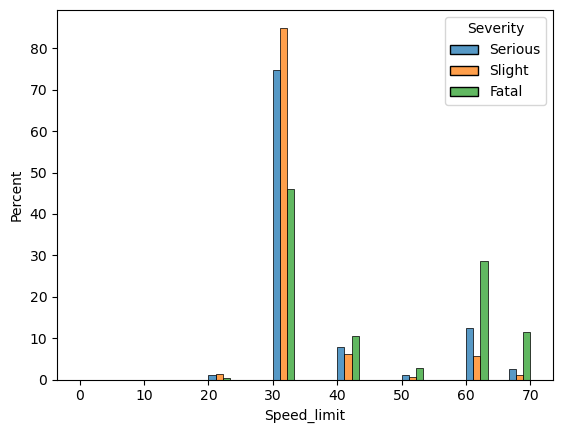

In [28]:
import seaborn as sns

# sns.kdeplot(data=df, x="Speed_limit", hue="Severity", common_norm=False)
sns.histplot(
    data=df,
    x="Speed_limit",
    hue="Severity",
    stat="percent",
    common_norm=False,
    multiple="dodge",
)
# df[(df['Speed_limit']%10 == 0) & (df.Severity == 'Serious')][['Speed_limit','Severity']].value_counts(normalize=True).sort_index().plot()

Vi kan også lave en visuel inspektion af sammenhængen mellem fartgrænser og alvorligheden af uheldene. <br>
Ved at bruge pandas groupby funktion (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) kan vi beregne andelen af "Severity" for hver fartgrænse. Vi kan derefter plotte disse andele i et stablet søjlediagram.

Vi har her givet et eksempel på hvordan sådan et diagram kan laves.

<Figure size 640x480 with 0 Axes>

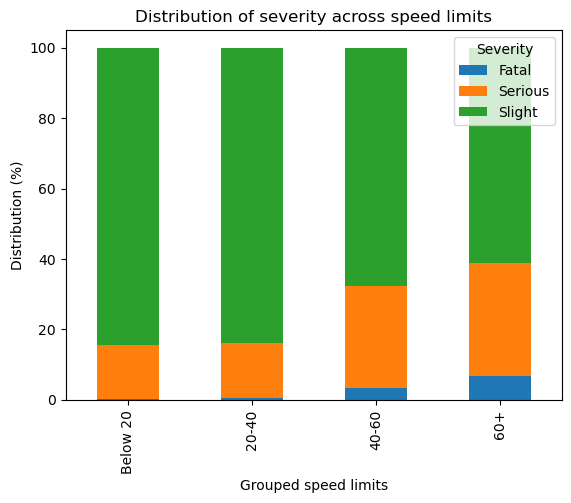

In [50]:
# # Initialize figure
# f, ax = plt.subplots()

# # Group speed limits within four ranges
# df["Speed_limit_gr"] = pd.cut(
#     df["Speed_limit"],
#     bins=[0, 20, 40, 60, 100],
#     labels=["Below 20", "20-40", "40-60", "60+"],
# )

# # Compute distribution of severity within speed limit groups and store in dataframe
# dfplot = (
#     df.groupby("Speed_limit_gr")["Severity"].value_counts(normalize=True).unstack()
#     * 100
# )
# # Plot dataframe as stacked barchart
# dfplot.plot(kind="bar", stacked=True, legend=False, ax=ax)

# # Set legend with white background and transparency
# legend = ax.legend(frameon=1)
# frame = legend.get_frame()
# frame.set_color("white")
# frame.set_alpha(0.8)

# # Set title and label
# ax.set_title("Distribution of severity across speed limits")
# ax.set_xlabel("Grouped speed limits")
# ax.set_ylabel("Distribution (%)")
# plt.show()



# Group speed limits within four ranges
df["Speed_limit_gr"] = pd.cut(
    df["Speed_limit"],
    bins=[0, 20, 40, 60, 100],
    labels=["Below 20", "20-40", "40-60", "60+"],
)

# Compute distribution of severity within speed limit groups and store in dataframe
dfplot = (
    df.groupby("Speed_limit_gr")["Severity"].value_counts(normalize=True).unstack()
    * 100
)

# Initialize figure
plt.figure()
# Plot dataframe as stacked barchart
dfplot.plot(kind="bar", stacked=True)

# Set legend
# plt.legend(title='Severity', frameon=True)
# Set title and label
plt.title("Distribution of severity across speed limits")
plt.xlabel("Grouped speed limits")
plt.ylabel("Distribution (%)")
plt.show()

Andelen af dødelige ulykker lader til at stige med fartgrænsen.

### Installér en pakke
Det er selvfølgelig praktisk at kunne installere nye pakker i python, for at kunne udnytte pythons fulde potentiale. <br>
En pakke kan installeres ved at bruge `pip` som vi aktiverer ved at sætte "!" foran, som det ses nedenfor. Her installerer vi pakken `pyjokes`, som man kan bruge til at få sig et lille grin :)

In [31]:
!pip install pyjokes

  Obtaining dependency information for pyjokes from https://files.pythonhosted.org/packages/6a/0e/4a824a4fc93b9725a985fcea7115927b72f2ca6966008300a982cb869720/pyjokes-0.6.0-py2.py3-none-any.whl.metadata


In [32]:
import pyjokes

In [34]:
pyjokes.get_joke()

"Why does Waldo only wear stripes? Because he doesn't want to be spotted."

Vi skal nu prøve at installere en anden pakke, nemlig [Faker](https://faker.readthedocs.io/en/master/#). På deres hjemmeside kan du læse om hvordan man installerer og bruger pakken. Prøv pakken lidt af nedenfor.

In [ ]:
!pip install faker

In [35]:
from faker import Faker

fake = Faker("da_DK")

print(fake.name())

Klara Eriksen


Når du har prøvet lidt af kan du prøve at lave et datasæt af 500 individer, hvor du danner falske navne og adresser (og måske nogle andre variable, som Faker kan hjælpe med at generere).

Hint: Du kan lave et datasæt ved at gemme værdier i lister, og bruge funktionen [`pd.DataFrame()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [37]:
name_list = []
address_list = []
city_list = []
birthdate_list = []
id_list = []

no_obs = 500

for i in range(no_obs):
    name_list.append(fake.unique.name())
    address_list.append(fake.unique.street_address())
    city_list.append(fake.city())
    birthdate_list.append(fake.date_of_birth(minimum_age=18))

df_fake = pd.DataFrame([name_list, address_list, city_list, birthdate_list]).T
df_fake.columns = ["Name", "Address", "City", "Date of birth"]
df_fake

,Name,Address,City,Date of birth
0,Michelle Skov,Valhalsstræde 6,Nykøbing M,1947-05-14
1,Søren Christoffersen,Dag Hammarskjöldsgade 311,Højer,1930-12-10
2,Mikael Koch,Tovværkgade 75,Bogø By,1929-03-31
3,Anne Thomsen,Allersgade 554,Nykøbing M,1953-02-01
4,Prof. Per Lauritsen,Svendborgvej 9,Greve Strand,1981-07-04
...,...,...,...,...
495,Dennis Winther,Skudehavnsgade 2,Vodskov,1980-09-10
496,Ursula Frederiksen,Stoltenbergsvej 17,Gedser,1928-12-20
497,Univ.Prof. Ole Vestergaard,Iranvej 85,Østbirk,2005-02-28
498,Britta Rasmussen,Tårnblæsergade 6,Mørkøv,1924-01-08


### Replikér et plot med Seaborn

Du skal nu prøve at replikere nedenstående plot så godt som muligt. Overvej hvad der skal til af datamanipulering for at nå derhen. Når du har forberedt dit data, kan du kigge her https://seaborn.pydata.org/generated/seaborn.countplot.html for det specifikke plot der er brugt.

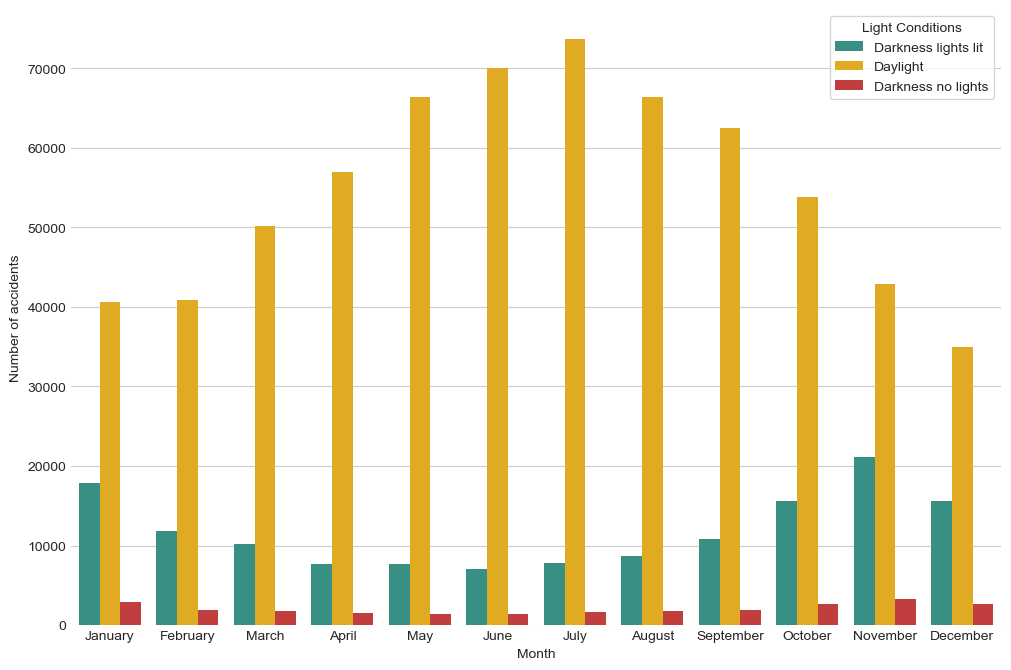

In [38]:
import seaborn as sns

# slet herfra
df["month_name"] = pd.to_datetime(df["Date"]).dt.month_name()
plt.style.use("seaborn-v0_8-whitegrid")
# plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = (16,10)
# plt.rcParams['axes.facecolor'] = 'w'
# plt.rcParams['grid.color'] = 'grey'

plt.figure(figsize=(12, 8))
colors = ["#2a9d8f", "#ffb703", "#d62828"]
sns.countplot(
    df,
    x="month_name",
    hue="Light_conditions",
    palette=colors,
    order=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.legend(title="Light Conditions", frameon=True)
plt.box(False)
plt.show()


# plt.figure(figsize=(12, 8))
# colors = ["#2a9d8f", "#ffb703", "#d62828"]
# sns.countplot(
#     df,
#     x="month_name",
#     hue="Severity",
#     palette=colors,
#     # stat='percent',
#     order=[
#         "January",
#         "February",
#         "March",
#         "April",
#         "May",
#         "June",
#         "July",
#         "August",
#         "September",
#         "October",
#         "November",
#         "December",
#     ],
# )
# plt.xlabel("Month")
# plt.ylabel("Number of accidents")
# plt.legend(frameon=True)
# plt.box(False)
# plt.show()


# plt.figure(figsize=(12, 8))
# sns.countplot(
#     df[df.Severity == "Fatal"],
#     x="month_name",
#     # stat='percent',
#     order=[
#         "January",
#         "February",
#         "March",
#         "April",
#         "May",
#         "June",
#         "July",
#         "August",
#         "September",
#         "October",
#         "November",
#         "December",
#     ],
# )
# plt.xlabel("Month")
# plt.ylabel("Number of accidents")
# plt.title("Fatal accidents")
# plt.box(False)
# plt.show()

# plt.figure(figsize=(12, 8))
# sns.countplot(
#     df,
#     x="month_name",
#     # stat='percent',
#     order=[
#         "January",
#         "February",
#         "March",
#         "April",
#         "May",
#         "June",
#         "July",
#         "August",
#         "September",
#         "October",
#         "November",
#         "December",
#     ],
# )
# plt.xlabel("Month")
# plt.ylabel("Number of accidents")
# plt.title("Monthly accidents")
# plt.box(False)
# plt.show()

##### Endnu et plot der kan reproduceres

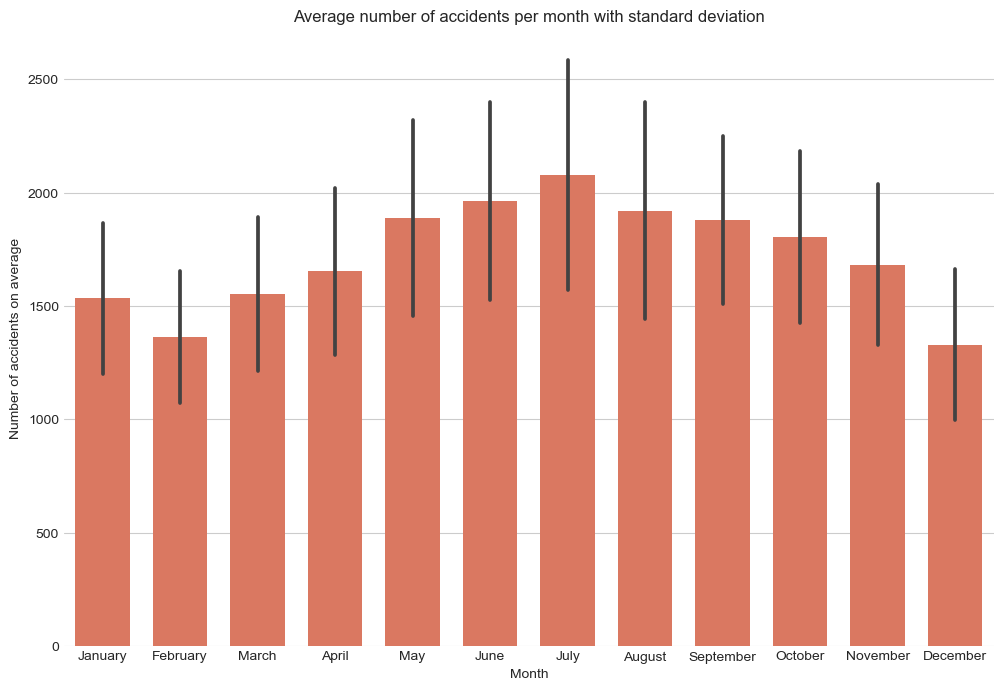

In [39]:
df
# df.pivot(index="year", columns="month_name")
tmp = df.groupby(["Year", "month_name"])["Accident_Index"].count().reset_index()
dfplot = tmp.pivot(index="Year", columns="month_name", values="Accident_Index")

order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

plt.figure(figsize=(12, 8))
# colors = ['#2a9d8f' , '#ffb703', '#d62828']
sns.barplot(dfplot, order=order, errorbar="sd", width=0.7, color="#EE6C4D")
plt.xlabel("Month")
plt.ylabel("Number of accidents on average")
# plt.legend(title='Light Conditions', frameon=True)
plt.title("Average number of accidents per month with standard deviation")
plt.box(False)
plt.show()

Distribution of severity of accidents across years with total on secondary axis

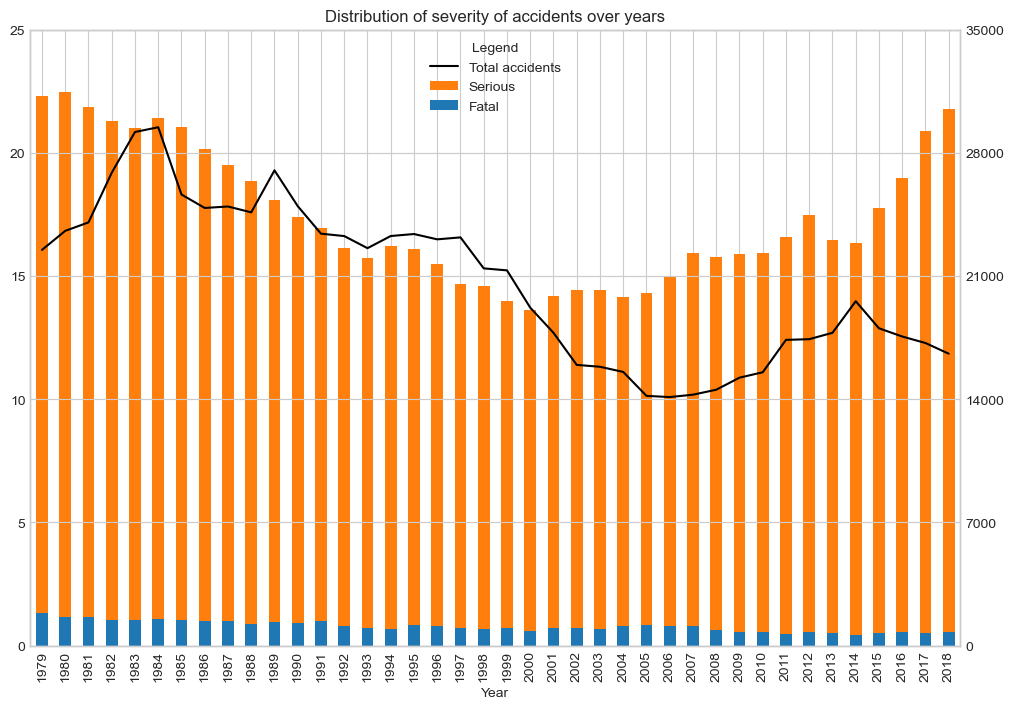

In [157]:
from matplotlib import ticker as mtick
import numpy as np

f, ax = plt.subplots(figsize=(12, 8))

splitted = (
    df.join(pd.get_dummies(df["Severity"]))
    .groupby("Year")[["Fatal", "Serious", "Slight"]]
    .sum()
    .values
)
summed = df[["Year"]].value_counts().sort_index().values.reshape(-1, 1)

values = splitted / summed * 100

dfplot = pd.DataFrame(values, columns=["Fatal", "Serious", "Slight"])
dfplot["Year"] = sorted(df.Year.unique())
dfplot.plot(
    kind="bar",
    x="Year",
    y=[
        "Fatal",
        "Serious",
    ],
    stacked=True,
    ax=ax,
    legend=False,
)
nticks = 5
ax2 = ax.twinx()
dfplot["Total accidents"] = (
    df[["Year"]].value_counts().sort_index().values.reshape(-1, 1)
)
dfplot.plot(
    kind="line",
    x="Year",
    y="Total accidents",
    ax=ax2,
    legend=False,
    color="black",
)
# ax2.plot(summed, color="black", label="Total no. accidents")
ax.set_yticks(ax.get_yticks())
divisor = 5000
ax2.set_yticks(
    np.linspace(
        0,
        np.ceil(ax2.get_ylim()[1] / divisor) * divisor,
        num=len(ax.get_yticks()),
    )
)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = ax2.legend(
    lines + lines2,
    labels + labels2,
    reverse=True,
    loc="upper center",
    frameon=1,
    title="Legend",
)

frame = legend.get_frame()
frame.set_color("white")
frame.set_alpha(0.8)

plt.title("Distribution of severity of accidents over years")

plt.show()